# Storytelling with Open Data and Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

print(sys.version)

3.6.2 |Anaconda custom (64-bit)| (default, Jul 20 2017, 13:51:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
!pip install wordcloud

In [3]:
from wordcloud import WordCloud

# Nova Scotia

## Permanent Liquor Licenses

About this dataset: https://data.novascotia.ca/Permits-and-Licensing/Permanent-Liquor-Licenses/en23-iwca

Time period: Current as of October 18, 2017

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/tarjin/NS_Open_Data/master/Permanent_Liquor_Licenses.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 8 columns):
LICENSE NUMBER    2145 non-null int64
LICENSE TYPE      2145 non-null object
ESTABLISHMENT     2145 non-null object
STREET ADDRESS    2145 non-null object
CITY/TOWN         2145 non-null object
PROVINCE          2123 non-null object
POSTAL CODE       2112 non-null object
Location          2145 non-null object
dtypes: int64(1), object(7)
memory usage: 134.1+ KB


In [6]:
df.head()

,LICENSE NUMBER,LICENSE TYPE,ESTABLISHMENT,STREET ADDRESS,CITY/TOWN,PROVINCE,POSTAL CODE,Location
0,5685,Club,Creignish Recreation Centre,2123 Highway 19,Creignish,NS,NaN,"Creignish, NS\n"
1,6319,Club,Englishtown Community Hall,,Englishtown,NS,NaN,"Englishtown, NS\n"
2,1236,Eating Establishment,Blarney Stone Restaurant,16339 Hwy #103,Hebbs Cross,NS,NaN,"Hebbs Cross, NS\n"
3,5574,Special Premises,Eagle Crest Golf Course,2075 Lakewood RD,Centreville,NS,NaN,"Centreville, NS\n"
4,5708,Special Premises,Republic Airline Inc,8909 Purdue RD,Indpls,IN,46268,"Indpls, IN 46268\n"


In [7]:
# df['CITY/TOWN'] = df['CITY/TOWN'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 8 columns):
LICENSE NUMBER    2145 non-null int64
LICENSE TYPE      2145 non-null object
ESTABLISHMENT     2145 non-null object
STREET ADDRESS    2145 non-null object
CITY/TOWN         2145 non-null object
PROVINCE          2123 non-null object
POSTAL CODE       2112 non-null object
Location          2145 non-null object
dtypes: int64(1), object(7)
memory usage: 134.1+ KB


In [9]:
df

,LICENSE NUMBER,LICENSE TYPE,ESTABLISHMENT,STREET ADDRESS,CITY/TOWN,PROVINCE,POSTAL CODE,Location
0,5685,Club,Creignish Recreation Centre,2123 Highway 19,Creignish,NS,NaN,"Creignish, NS\n"
1,6319,Club,Englishtown Community Hall,,Englishtown,NS,NaN,"Englishtown, NS\n"
2,1236,Eating Establishment,Blarney Stone Restaurant,16339 Hwy #103,Hebbs Cross,NS,NaN,"Hebbs Cross, NS\n"
3,5574,Special Premises,Eagle Crest Golf Course,2075 Lakewood RD,Centreville,NS,NaN,"Centreville, NS\n"
4,5708,Special Premises,Republic Airline Inc,8909 Purdue RD,Indpls,IN,46268,"Indpls, IN 46268\n"
5,5396,Eating Establishment,Morris East,5212 Morris ST,Halifax,NS,B3J 14,"Halifax, NS B3J 14\n(44.646244, -63.573566)"
6,1913,Eating Establishment,Marco's Grill & Pasta House,624 Main ST,Yarmouth,NS,B5A 4A9,"Yarmouth, NS B5A 4A9\n(43.891389, -66.12908)"
7,1842,Club,Ken Wo Country Club,9514 Commercial ST,New Minas,NS,B4N 3E9,"New Minas, NS B4N 3E9\n(45.07321, -64.435412)"
8,5325,Eating Establishment,Yan's Restaurant,752 Sackville Drive,Lower Sackville,NS,B4E 1R7,"Lower Sackville, NS B4E 1R7\n(44.77285, -63.69..."
9,5191,Eating Establishment,Tan's Family Restaurant,900 Cole Harbour RD,Dartmouth,NS,B2V 2J4,"Dartmouth, NS B2V 2J4\n(44.728992, -63.654891)"


In [10]:
df = df.sort_values('CITY/TOWN', ascending=True)

In [11]:
df.head()

,LICENSE NUMBER,LICENSE TYPE,ESTABLISHMENT,STREET ADDRESS,CITY/TOWN,PROVINCE,POSTAL CODE,Location
1427,5927,Lounge,Wild Caraway Cafe and Restaurant,3721 Highway 209,Advocate Harbour,NS,B0M 1A0,"Advocate Harbour, NS B0M 1A0\n(45.33839, -64.7..."
1209,5503,Eating Establishment,Wild Caraway Cafe and Restaurant,3721 Highway 209,Advocate Harbour,NS,B0M 1A0,"Advocate Harbour, NS B0M 1A0\n(45.33839, -64.7..."
426,5294,Eating Establishment,Lightkeepers Kitchen,1 Cape d'Or RD,Advocate Harbour,NS,B0M 1A0,"Advocate Harbour, NS B0M 1A0\n(45.33839, -64.7..."
66,4887,Club,Mira Boat Club & Seniors Community Centre,545 Hillside RD,Albert Bridge,NS,B1K 3H9,"Albert Bridge, NS B1K 3H9\n(46.025369, -60.083..."
377,1038,Club,Albert Bridge Vol. Fire Dept.,4330 Highway 22,Albert Bridge,NS,B1K 2P4,"Albert Bridge, NS B1K 2P4\n(46.015874, -60.059..."


In [12]:
df.tail()

,LICENSE NUMBER,LICENSE TYPE,ESTABLISHMENT,STREET ADDRESS,CITY/TOWN,PROVINCE,POSTAL CODE,Location
267,1222,Club,Yarmouth Lions Club,87 Parade ST,Yarmouth,NS,B5A 3B3,"Yarmouth, NS B5A 3B3\n(43.836511, -66.108057)"
269,1512,Eating Establishment,Gales Eatery,417 Main ST,Yarmouth,NS,B5A 4B2,"Yarmouth, NS B5A 4B2\n(43.867322, -66.105665)"
1879,6306,Lounge,Sip Cafe,357 Main ST,Yarmouth,NS,B5A 1E7,"Yarmouth, NS B5A 1E7\n(43.837579, -66.120064)"
1655,1814,Special Premises,Yarmouth Arts Regional Centre,76 Parade ST,Yarmouth,NS,B5A 3B3,"Yarmouth, NS B5A 3B3\n(43.836511, -66.108057)"
984,5306,Eating Establishment,Boston Pizza - Yarmouth,134 Starr's RD,Yarmouth,NS,B5A 4E5,"Yarmouth, NS B5A 4E5\n(43.839019, -66.092802)"


In [13]:
df_text = df[['CITY/TOWN']]

In [14]:
type(df_text)

pandas.core.frame.DataFrame

In [15]:
df_text

,CITY/TOWN
1427,Advocate Harbour
1209,Advocate Harbour
426,Advocate Harbour
66,Albert Bridge
377,Albert Bridge
1871,Allains Creek
562,Amherst
977,Amherst
970,Amherst
847,Amherst


In [16]:
df_text.to_csv('City.csv', index=False)

In [17]:
text = open('City.csv').read()

In [18]:
wordcloud = WordCloud(collocations=False, background_color="black",max_font_size=40, relative_scaling=.5).generate(text)

In [19]:
plt.rcParams['figure.figsize']=(15,200)

In [20]:
plt.figure()

In [21]:
plt.imshow(wordcloud)

In [22]:
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

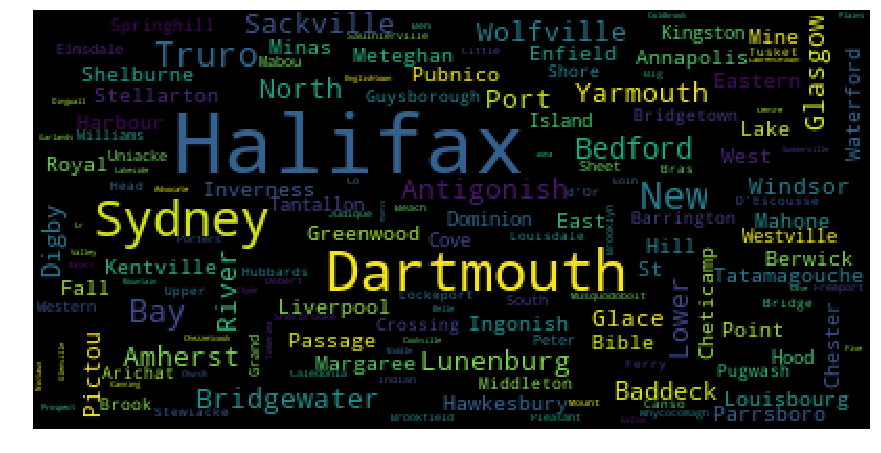

In [23]:
plt.show()